# K-Nearest Neighbors

Nearest neighbors is one of the simplest predictive models. It makes no mathematical assumptions. The only things it requires are:
- Some notion of distance
- An assumption that points that are close to one another are similar

Most of the techniques look at the dataset as a whole to learn patterns un the data. Nearest neighbors:
- neglects a lot of information, since the prediction for each new point depends only on the handful of points closest to it.
- is probably not going to help you understand the drivers of whatever phenomenon you're looking at.

In general situation, we have some data points and we have a corresponding set of labels (a classificartion problem, with 2 or more labels).

Let's say we've picked a number k. Then we want to classify some new data point, we find the k nearest labeled points and let them vote on the new output. To do this, we need a function that counts votes.

## The Model

In [8]:
labels = ['a', 'b', 'c', 'b', 'a']

In [11]:
from collections import Counter
vote_counts = Counter(labels)
vote_counts

Counter({'a': 2, 'b': 2, 'c': 1})

In [15]:
vote_counts.most_common(1)

[('a', 2)]

In [16]:
vote_counts.most_common(1)[0]

('a', 2)

In [24]:
winner, winner_count = vote_counts.most_common(1)[0]
winner, winner_count

('a', 2)

In [18]:
vote_counts.keys()

dict_keys(['a', 'b', 'c'])

In [17]:
vote_counts.values()

dict_values([2, 2, 1])

In [25]:
[count 
for count in vote_counts.values()
if count == winner_count]

[2, 2]

In [28]:
num_winners = len([count 
                    for count in vote_counts.values()
                    if count == winner_count])
num_winners

2

In [30]:
from typing import List

def majority_vote(labels: List[str]) -> str:
    '''Assumes that labels are ordered from nearest to farthest.'''
    vote_counts = Counter(labels)
    winner, winner_count = vote_counts.most_common(1)[0]
    num_winners = len([count 
                    for count in vote_counts.values()
                    if count == winner_count])
    if num_winners == 1:
        return winner # unique winner, so return it
    else:
        return majority_vote(labels[:-1]) # try again without the farthest

In [31]:
assert majority_vote(['a', 'b', 'c', 'b', 'a']) == 'b'

'b'

In [32]:
from typing import NamedTuple
from scratch.linear_algebra import Vector, distance

class LabeledPoint(NamedTuple):
    point: Vector
    label: str

In [34]:
# kNN Classifier
def knn_classify(k: int,
                labeled_points: List[LabeledPoint],
                new_point: Vector) -> str:
    
    # Order the labeled points from nearest to farthest.
    by_distance = sorted(labeled_points,
                        key=lambda lp: distance(lp.point, new_point))
    
    # Find the labels for the k closest
    k_nearest_labels = [lp.label for lp in by_distance[:k]]
    
    # and let them vote.
    return majority_vote(k_nearest_labels)

## Example 1: Favorite Languages

In [40]:
# each entry is ([longitude, latitude], favorite_language)

cities = [([-122.3 , 47.53], "Python"), # Seattle 
          ([ -96.85, 32.85], "Java"), # Austin
          ([ -89.33, 43.13], "R"), # Madison # ... and so on
]

cities = [(-86.75,33.5666666666667,'Python'),(-88.25,30.6833333333333,'Python'),(-112.016666666667,33.4333333333333,'Java'),(-110.933333333333,32.1166666666667,'Java'),(-92.2333333333333,34.7333333333333,'R'),(-121.95,37.7,'R'),(-118.15,33.8166666666667,'Python'),(-118.233333333333,34.05,'Java'),(-122.316666666667,37.8166666666667,'R'),(-117.6,34.05,'Python'),(-116.533333333333,33.8166666666667,'Python'),(-121.5,38.5166666666667,'R'),(-117.166666666667,32.7333333333333,'R'),(-122.383333333333,37.6166666666667,'R'),(-121.933333333333,37.3666666666667,'R'),(-122.016666666667,36.9833333333333,'Python'),(-104.716666666667,38.8166666666667,'Python'),(-104.866666666667,39.75,'Python'),(-72.65,41.7333333333333,'R'),(-75.6,39.6666666666667,'Python'),(-77.0333333333333,38.85,'Python'),(-80.2666666666667,25.8,'Java'),(-81.3833333333333,28.55,'Java'),(-82.5333333333333,27.9666666666667,'Java'),(-84.4333333333333,33.65,'Python'),(-116.216666666667,43.5666666666667,'Python'),(-87.75,41.7833333333333,'Java'),(-86.2833333333333,39.7333333333333,'Java'),(-93.65,41.5333333333333,'Java'),(-97.4166666666667,37.65,'Java'),(-85.7333333333333,38.1833333333333,'Python'),(-90.25,29.9833333333333,'Java'),(-70.3166666666667,43.65,'R'),(-76.6666666666667,39.1833333333333,'R'),(-71.0333333333333,42.3666666666667,'R'),(-72.5333333333333,42.2,'R'),(-83.0166666666667,42.4166666666667,'Python'),(-84.6,42.7833333333333,'Python'),(-93.2166666666667,44.8833333333333,'Python'),(-90.0833333333333,32.3166666666667,'Java'),(-94.5833333333333,39.1166666666667,'Java'),(-90.3833333333333,38.75,'Python'),(-108.533333333333,45.8,'Python'),(-95.9,41.3,'Python'),(-115.166666666667,36.0833333333333,'Java'),(-71.4333333333333,42.9333333333333,'R'),(-74.1666666666667,40.7,'R'),(-106.616666666667,35.05,'Python'),(-78.7333333333333,42.9333333333333,'R'),(-73.9666666666667,40.7833333333333,'R'),(-80.9333333333333,35.2166666666667,'Python'),(-78.7833333333333,35.8666666666667,'Python'),(-100.75,46.7666666666667,'Java'),(-84.5166666666667,39.15,'Java'),(-81.85,41.4,'Java'),(-82.8833333333333,40,'Java'),(-97.6,35.4,'Python'),(-122.666666666667,45.5333333333333,'Python'),(-75.25,39.8833333333333,'Python'),(-80.2166666666667,40.5,'Python'),(-71.4333333333333,41.7333333333333,'R'),(-81.1166666666667,33.95,'R'),(-96.7333333333333,43.5666666666667,'Python'),(-90,35.05,'R'),(-86.6833333333333,36.1166666666667,'R'),(-97.7,30.3,'Python'),(-96.85,32.85,'Java'),(-95.35,29.9666666666667,'Java'),(-98.4666666666667,29.5333333333333,'Java'),(-111.966666666667,40.7666666666667,'Python'),(-73.15,44.4666666666667,'R'),(-77.3333333333333,37.5,'Python'),(-122.3,47.5333333333333,'Python'),(-89.3333333333333,43.1333333333333,'R'),(-104.816666666667,41.15,'Java')]
cities = [([longitude, latitude], language) for longitude, latitude, language in cities]

len(cities)


75

In [36]:
# Predict the favorite programming languages for places that weren’t part of the survey

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
# Step 1: Plot the data

def plot_state_borders(plt, color='0.8'):
    pass

def plot_cities():

    # key is language, value is pair (longitudes, latitudes)
    plots = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }

    # we want each language to have a different marker and color
    markers = { "Java" : "o", "Python" : "s", "R" : "^" }
    colors  = { "Java" : "r", "Python" : "b", "R" : "g" }

    for (longitude, latitude), language in cities:
        plots[language][0].append(longitude)
        plots[language][1].append(latitude)

    # create a scatter series for each language
    for language, (x, y) in plots.items():
        plt.scatter(x, y, color=colors[language], marker=markers[language],
                          label=language, zorder=10)

    plot_state_borders(plt)    # assume we have a function that does this

    plt.legend(loc=0)          # let matplotlib choose the location
    plt.axis([-130,-60,20,55]) # set the axes
    plt.title("Favorite Programming Languages")
    plt.show()

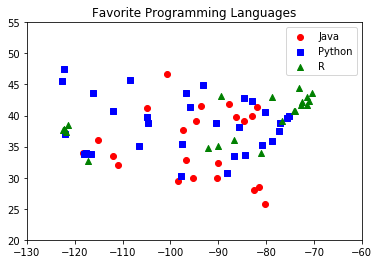

In [55]:
plot_cities()

In [90]:
locations = [location for (location, language) in cities]
#locations

In [93]:
languages = [language for (location, language) in cities]
#languages

In [100]:
# Non-pythonic way
cities2 = []
for i in range (len(cities)):
    cities2.append(LabeledPoint(locations[i], languages[i]))
    
#cities2

In [104]:
# Pythonic way using list comprehension
cities2 = [LabeledPoint(locations[_], languages[_])
          for _ in range(len(cities))]
cities2[:5]

[LabeledPoint(point=[-86.75, 33.5666666666667], label='Python'),
 LabeledPoint(point=[-88.25, 30.6833333333333], label='Python'),
 LabeledPoint(point=[-112.016666666667, 33.4333333333333], label='Java'),
 LabeledPoint(point=[-110.933333333333, 32.1166666666667], label='Java'),
 LabeledPoint(point=[-92.2333333333333, 34.7333333333333], label='R')]

In [105]:
# try several different values for k
for k in[1, 3, 5, 7]: 
    num_correct = 0

    for city in cities2:
        location, actual_language = city 
        other_cities = [other_city
                        for other_city in cities2 
                        if other_city != city]
        
        predicted_language = knn_classify(k, other_cities, location) 
        if predicted_language == actual_language:
            num_correct += 1

    print(k, "neighbor[s]:", num_correct, "correct out of", len(cities2))

1 neighbor[s]: 40 correct out of 75
3 neighbor[s]: 44 correct out of 75
5 neighbor[s]: 41 correct out of 75
7 neighbor[s]: 35 correct out of 75


In [106]:
44/75*100

58.666666666666664

It looks like 3-nearest neighbors performs the best, giving the correct result about 59% of the time.

What regions would get classified to which languages under each nearest neighbors scheme? We can do that by classifying an entire grid worth of points, and then plotting them as we did the cities

In [109]:
plots = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }
k = 1 # or 3, or 5, or ...
for longitude in range(-130, -60): 
    for latitude in range(20, 55):
        predicted_language = knn_classify(k, cities2, [longitude, latitude])
        plots[predicted_language][0].append(longitude)
        plots[predicted_language][1].append(latitude)

In [139]:
def plot_cities2(k: int):

    # key is language, value is pair (longitudes, latitudes)
    plots = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }

    # we want each language to have a different marker and color
    markers = { "Java" : "o", "Python" : "s", "R" : "^" }
    colors  = { "Java" : "r", "Python" : "b", "R" : "g" }

    #k = 1 # or 3, or 5, or ...
    for longitude in range(-130, -60): 
        for latitude in range(20, 55):
            predicted_language = knn_classify(k, cities2, [longitude, latitude])
            plots[predicted_language][0].append(longitude)
            plots[predicted_language][1].append(latitude)
            
    plt.figure(figsize=(10,8))

    # create a scatter series for each language
    for language, (x, y) in plots.items():
        plt.scatter(x, y, color=colors[language], marker=markers[language],
                          label=language, zorder=10)

    plot_state_borders(plt)    # assume we have a function that does this

    plt.legend(loc=0)          # let matplotlib choose the location
    plt.axis([-130,-60,20,55]) # set the axes
    plt.title("Favorite Programming Languages")
    plt.show()

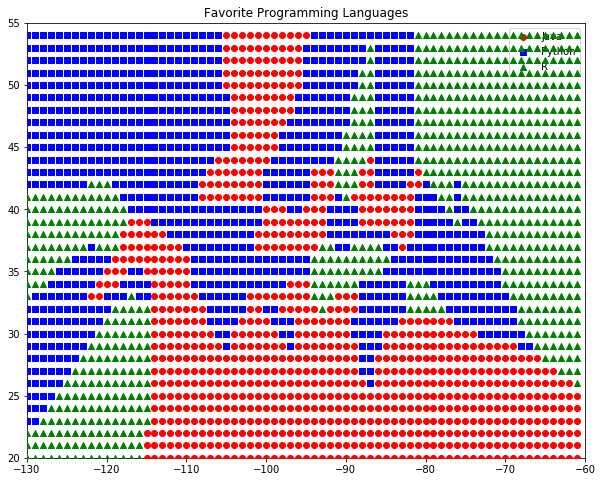

In [140]:
plot_cities2(1)

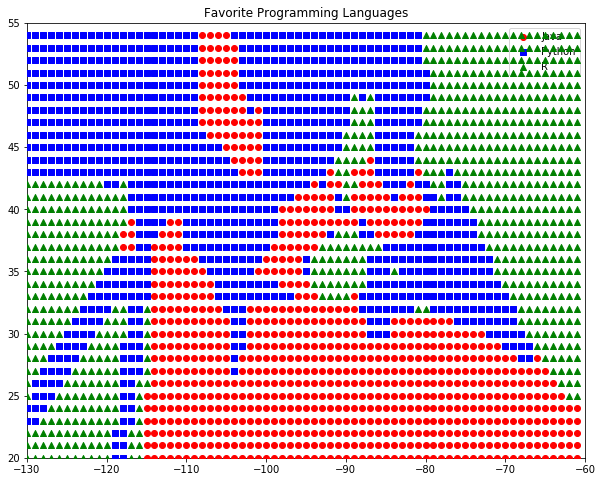

In [141]:
plot_cities2(3)

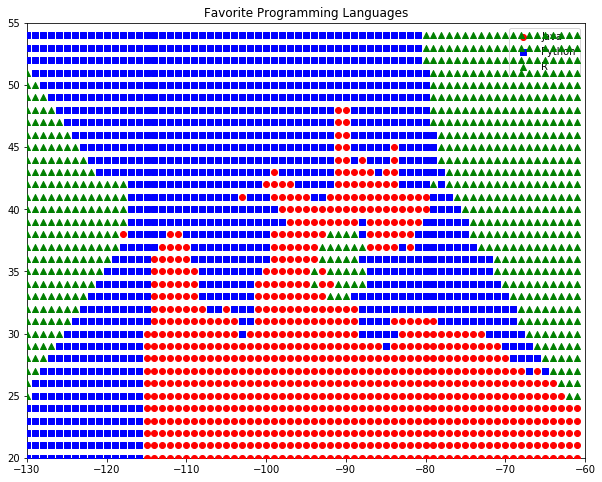

In [142]:
plot_cities2(5)

## Example 2

In [ ]:
import requests
data = requests.get()